In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [10]:
from pandas import read_csv
col_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data_frame = read_csv("F:\\Data Science\\Data Sets\\pima-indians-diabetes.csv", header = 0, names = col_names)
data_frame

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
data_frame.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [12]:
data_frame.shape

(768, 9)

In [13]:
array = data_frame.values
X = array[:,0:8]
Y = array[:,8]

In [14]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [15]:
Y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

In [8]:
scale = StandardScaler()
scaled_data = scale.fit_transform(X)
scaled_data

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [9]:
X = scaled_data
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [10]:
num_folds = 10
kfold = KFold(n_splits = 10)

In [11]:
model = KNeighborsClassifier(n_neighbors = 17)
results = cross_val_score( model, X, Y, cv = kfold)

In [12]:
results

array([0.68831169, 0.79220779, 0.68831169, 0.63636364, 0.74025974,
       0.79220779, 0.79220779, 0.84415584, 0.68421053, 0.77631579])

In [13]:
results.mean()

0.7434552289815447

GRID SEARCH FOR ALGORITHM TUNING

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [15]:
n_neighbors = np.array(range(1,41))
param_grid = dict( n_neighbors = n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40])}

In [16]:
model = KNeighborsClassifier()
grid = GridSearchCV( estimator = model, param_grid = param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])})

In [17]:
print(grid.best_score_)
print(grid.best_params_)

0.7669892199303965
{'n_neighbors': 17}


In [18]:
model = KNeighborsClassifier(n_neighbors = 17)

In [19]:
scores = cross_val_score(model, X, Y, cv = 5)
scores

array([0.75324675, 0.74025974, 0.75974026, 0.81045752, 0.77124183])

In [20]:
scores.mean()

0.7669892199303965

VISUALIZING THE CV RESULTS

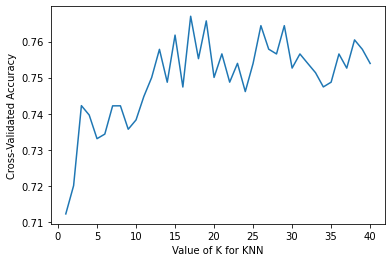

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
# choose k between 1 to 41
k_range = range(1,41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, Y, cv = 5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

ASSIGNMENT - KNN on claimants.csv

In [31]:
from pandas import read_csv
#col_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
claimants = read_csv("F:\\Data Science\\Data Sets\\claimants.csv") # header = 0, names = col_names)
claimants

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [32]:
claimants.dtypes

CASENUM       int64
ATTORNEY      int64
CLMSEX      float64
CLMINSUR    float64
SEATBELT    float64
CLMAGE      float64
LOSS        float64
dtype: object

In [33]:
claimants.shape

(1340, 7)

In [42]:
claimants.isnull().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [43]:
claimants = claimants.dropna()

In [44]:
claimants.shape

(1096, 7)

In [45]:
array = claimants.values
X = array[:,2:7]
Y = array[:,1]

In [46]:
X

array([[ 0.   ,  1.   ,  0.   , 50.   , 34.94 ],
       [ 1.   ,  0.   ,  0.   , 18.   ,  0.891],
       [ 0.   ,  1.   ,  0.   ,  5.   ,  0.33 ],
       ...,
       [ 1.   ,  1.   ,  0.   , 39.   ,  0.099],
       [ 1.   ,  0.   ,  0.   ,  8.   ,  3.177],
       [ 1.   ,  1.   ,  0.   , 30.   ,  0.688]])

In [47]:
Y

array([0., 1., 1., ..., 1., 0., 1.])

In [48]:
scale = StandardScaler()
scaled_data = scale.fit_transform(X)
scaled_data

array([[-1.13916369,  0.32550512, -0.13633547,  1.05048704,  2.96924493],
       [ 0.87783697, -3.07214831, -0.13633547, -0.51942439, -0.28328699],
       [-1.13916369,  0.32550512, -0.13633547, -1.15720091, -0.33687653],
       ...,
       [ 0.87783697,  0.32550512, -0.13633547,  0.51082998, -0.35894281],
       [ 0.87783697, -3.07214831, -0.13633547, -1.01002171, -0.06491676],
       [ 0.87783697,  0.32550512, -0.13633547,  0.0692924 , -0.30267857]])

In [49]:
X = scaled_data
X

array([[-1.13916369,  0.32550512, -0.13633547,  1.05048704,  2.96924493],
       [ 0.87783697, -3.07214831, -0.13633547, -0.51942439, -0.28328699],
       [-1.13916369,  0.32550512, -0.13633547, -1.15720091, -0.33687653],
       ...,
       [ 0.87783697,  0.32550512, -0.13633547,  0.51082998, -0.35894281],
       [ 0.87783697, -3.07214831, -0.13633547, -1.01002171, -0.06491676],
       [ 0.87783697,  0.32550512, -0.13633547,  0.0692924 , -0.30267857]])

In [50]:
num_folds = 10
kfold = KFold(n_splits = 10)
kfold

KFold(n_splits=10, random_state=None, shuffle=False)

In [52]:
model = KNeighborsClassifier(n_neighbors = 17)
results = cross_val_score( model, X, Y, cv = kfold)
results

array([0.67272727, 0.63636364, 0.67272727, 0.62727273, 0.7       ,
       0.63636364, 0.62385321, 0.67889908, 0.66055046, 0.70642202])

In [53]:
results.mean()

0.6615179316096749

GRID SEARCH

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [55]:
n_neighbors = np.array(range(1,41))
param_grid = dict( n_neighbors = n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40])}

In [56]:
model = KNeighborsClassifier()
grid = GridSearchCV( estimator = model, param_grid = param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])})

In [57]:
print(grid.best_score_)
print(grid.best_params_)

0.6797509339975093
{'n_neighbors': 38}


In [58]:
model = KNeighborsClassifier(n_neighbors = 38)

In [59]:
scores = cross_val_score(model, X, Y, cv = 5)
scores

array([0.67272727, 0.63926941, 0.68949772, 0.67123288, 0.7260274 ])

In [60]:
scores.mean()

0.6797509339975093

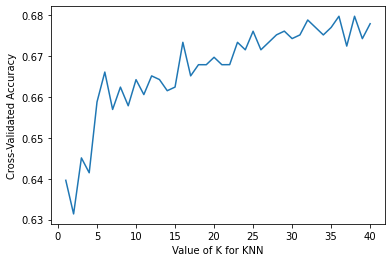

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
# choose k between 1 to 41
k_range = range(1,41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, Y, cv = 5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()